# 1. Data Driven Forecasting

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsaplots

from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
# Import Dataset
airlines=pd.read_excel('Airlines+Data.xlsx',parse_dates=True)
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Explore and Visualize the Series

In [3]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
airlines['Month'].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

<Axes: >

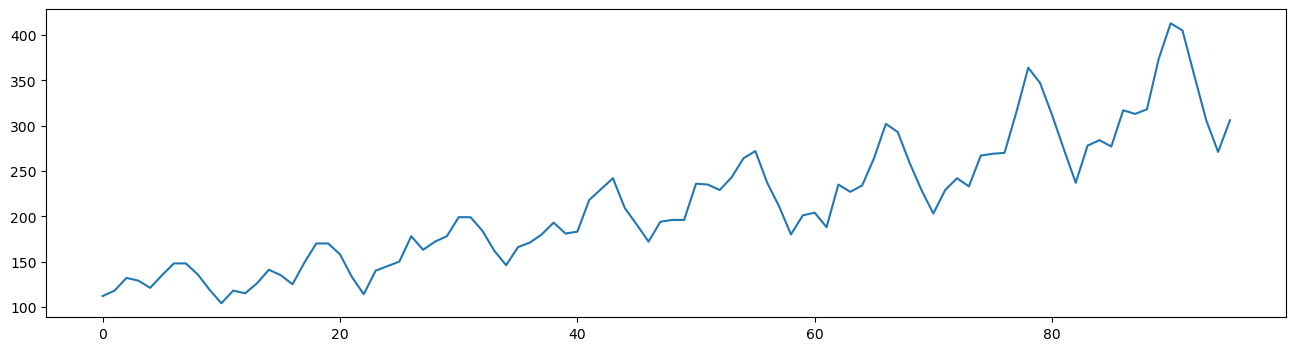

In [5]:
# Line plot
airlines['Passengers'].plot(figsize=(16,4))

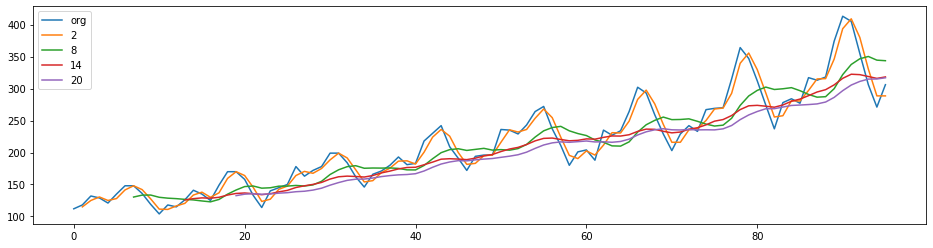

In [6]:
# Moving Average Smoothing
plt.figure(figsize=(16,4))
airlines['Passengers'].plot(label='org')
for i in range(2,24,6):     # 2 to 24 with step size = 6
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

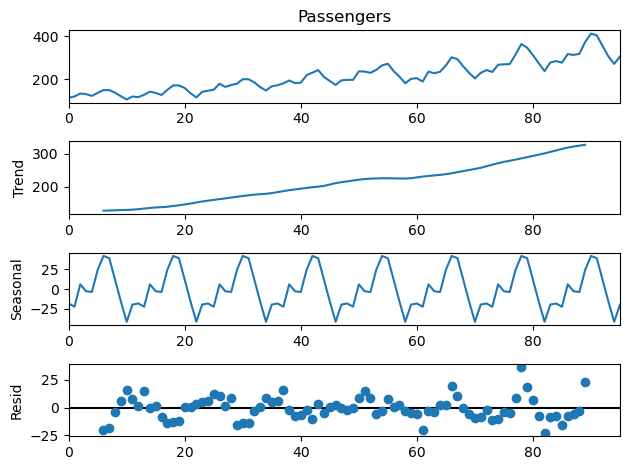

In [6]:
# Time Series Decomposition plot - To understand various componenents of data
airlines_decompose=seasonal_decompose(airlines['Passengers'],period=12)
airlines_decompose.plot();

C:\Users\tambe\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


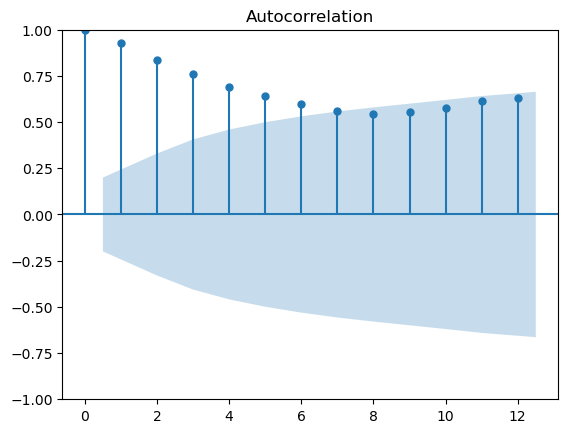

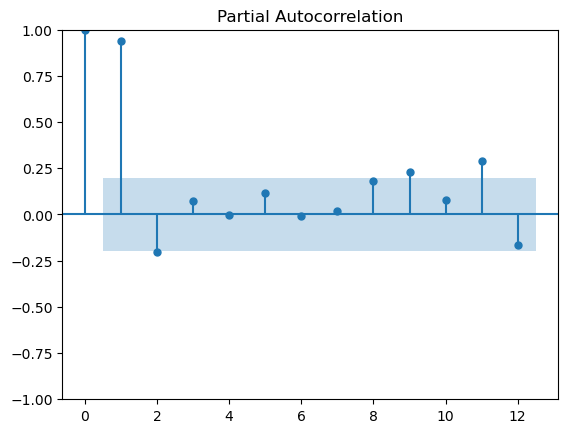

In [7]:
# ACF Plots and PACF Plots
tsaplots.plot_acf(airlines['Passengers'],lags=12)
tsaplots.plot_pacf(airlines['Passengers'],lags=12);

### Splitting Data into Train and Test

In [8]:
train=airlines.head(84)
test=airlines.tail(12)

### Data Driven Model Building - Exponential Smoothing Methods

In [9]:
# 1. Simple Exponential Smoothing Model
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2) # α-value = Smoothing_level = 0.2
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Passengers'],pred_ses))
rmse

64.84476396990497

In [10]:
# 2. Holt's Exponential Smoothing Model
hes_model=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2) # β-value = smoothing_slope = 0.2
pred_hes=hes_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Passengers'],pred_hes))
rmse

C:\Users\tambe\AppData\Local\Temp\ipykernel_26296\557746763.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hes_model=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2) # β-value = smoothing_slope = 0.2


95.7667445267524

In [11]:
# 3. Holt Winter Exponential Smoothing Model with additive trend and additive seasonality
hwes_add_add_model=ExponentialSmoothing(train['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
pred_hwes_add_add=hwes_add_add_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Passengers'],pred_hwes_add_add))
rmse

29.604474237998442

In [13]:
# 4. Holt Winter Exponential Smoothing Model with additive trend and multiplicative seasonality
hwes_add_mul_model=ExponentialSmoothing(train['Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit()
pres_hwes_add_mul=hwes_add_mul_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Passengers'],pres_hwes_add_mul))
rmse

12.921008951981054

### Final Model

In [14]:
final_hwes_add_add_model=ExponentialSmoothing(airlines['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()

### Forecasting

In [15]:
# Forecasting for next 12 time periods
forecast=final_hwes_add_add_model.forecast(12)
forecast

96     319.235250
97     311.528363
98     350.278666
99     346.984953
100    351.844997
101    403.925669
102    440.566746
103    427.446408
104    376.628091
105    329.767424
106    296.561195
107    341.114658
dtype: float64

<Axes: >

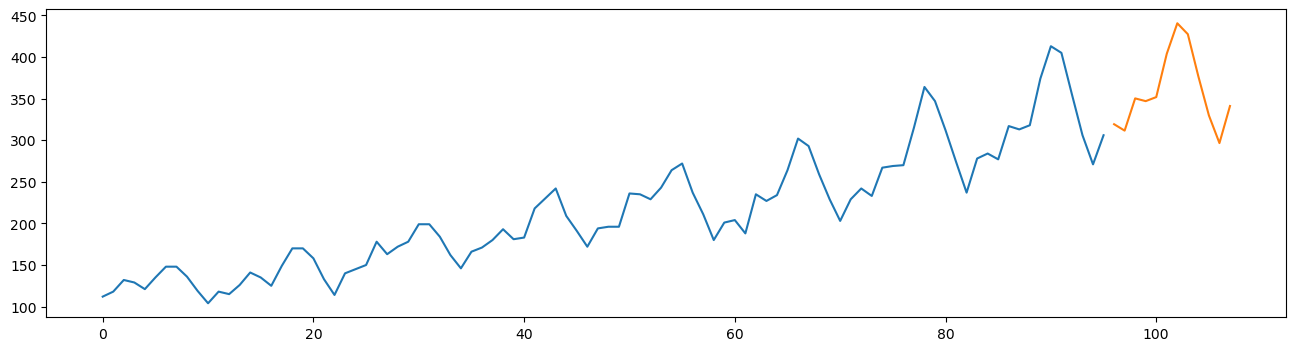

In [16]:
# Forecast Plot
airlines['Passengers'].plot(figsize=(16,4))
forecast.plot()

# 2. Model Based Forecasting

In [17]:
# Import Libraries
from datetime import datetime

In [18]:
# Import Dataset
airlines1=pd.read_excel('Airlines+Data.xlsx')
airlines1

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Explore and Visualize the Series

<Axes: >

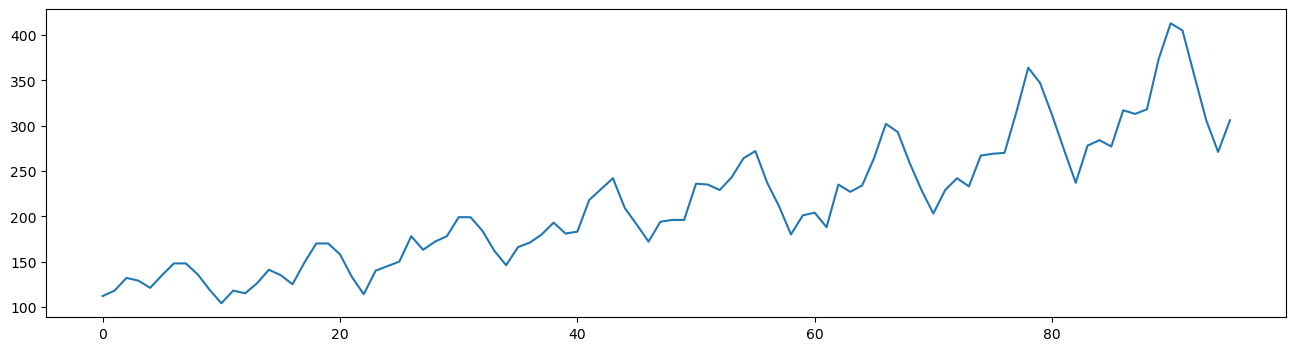

In [19]:
# Line plot
airlines1['Passengers'].plot(figsize=(16,4))

In [20]:
# converting the Month column to datetime data
airlines1['date']=pd.to_datetime(airlines1['Month'],format='%b-%y') # %b-%y = month -year
airlines1['date']

0    1995-01-01
1    1995-02-01
2    1995-03-01
3    1995-04-01
4    1995-05-01
        ...    
91   2002-08-01
92   2002-09-01
93   2002-10-01
94   2002-11-01
95   2002-12-01
Name: date, Length: 96, dtype: datetime64[ns]

In [21]:
airlines1

,Month,Passengers,date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [23]:
# Extracting day name,weekday name, month name, year name from the 'date' column using Date function (dt) from pandas.
# The strftime() function is used to convert date and time objects to their string representation.

airlines1['day']=airlines1['date'].dt.strftime('%d') # Day Extraction
airlines1['weekday']=airlines1['date'].dt.strftime('%A') # Weekday (sunday, monday, tuesday...) Extraction
airlines1['month']=airlines1['date'].dt.strftime('%b') # Month (Jan, Feb, Mar...) Extraction
airlines1['year']=airlines1['date'].dt.strftime('%Y') # Year Extraction

In [24]:
airlines1

,Month,Passengers,date,day,weekday,month,year
0,1995-01-01,112,1995-01-01,01,Sunday,Jan,1995
1,1995-02-01,118,1995-02-01,01,Wednesday,Feb,1995
2,1995-03-01,132,1995-03-01,01,Wednesday,Mar,1995
3,1995-04-01,129,1995-04-01,01,Saturday,Apr,1995
4,1995-05-01,121,1995-05-01,01,Monday,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,01,Thursday,Aug,2002
92,2002-09-01,355,2002-09-01,01,Sunday,Sep,2002
93,2002-10-01,306,2002-10-01,01,Tuesday,Oct,2002
94,2002-11-01,271,2002-11-01,01,Friday,Nov,2002


In [25]:
# Make pivot table of year and month for plotting heatmap
passengers_heatmap=pd.pivot_table(data=airlines1,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
passengers_heatmap

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='month', ylabel='year'>

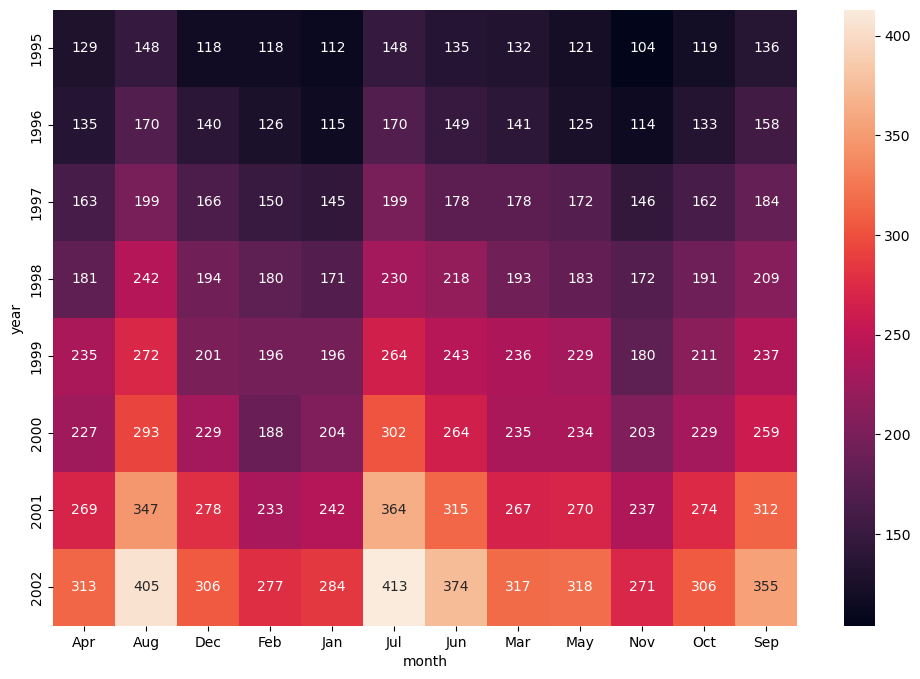

In [26]:
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(passengers_heatmap,annot=True,fmt='g')

<Axes: xlabel='year', ylabel='Passengers'>

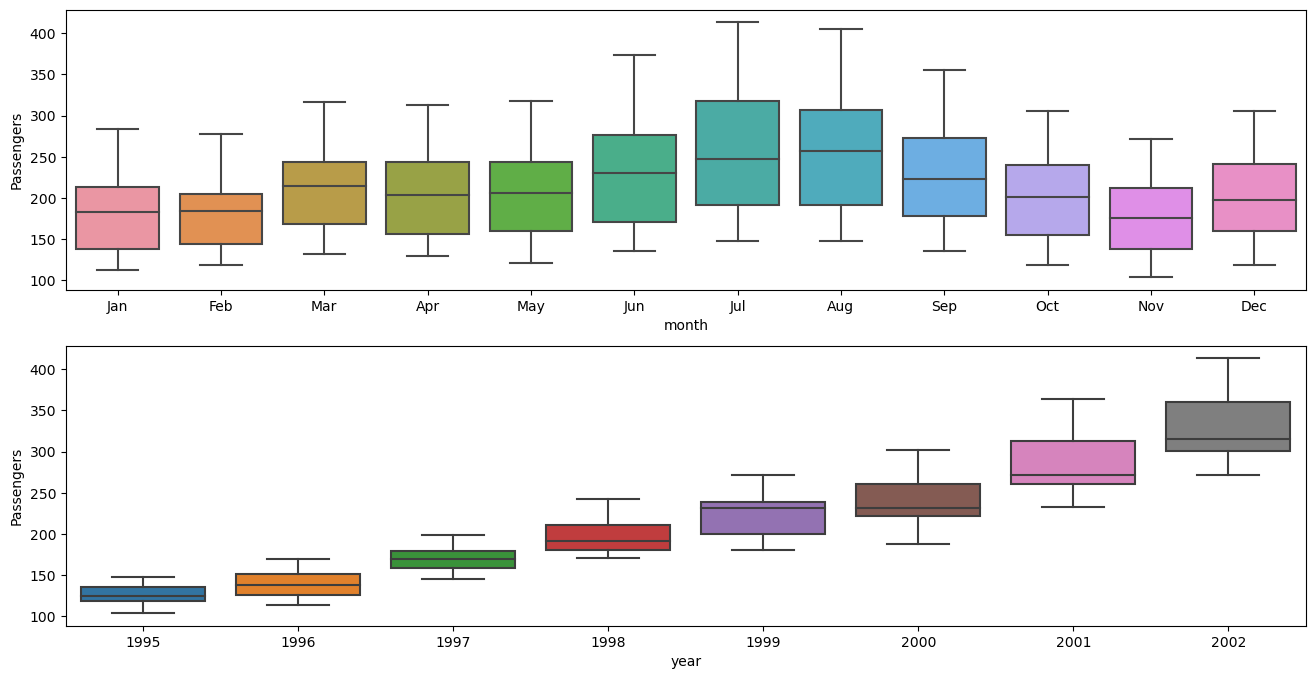

In [27]:
# Boxplots for months and years
plt.figure(figsize=(16,8))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=airlines1)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=airlines1)

<Axes: xlabel='year', ylabel='Passengers'>

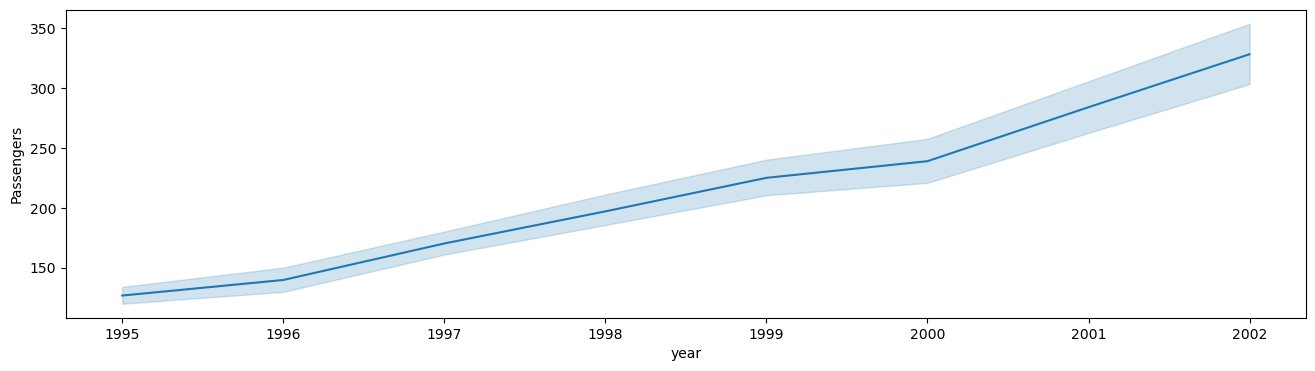

In [28]:
# Line plot of year vs passengers
plt.figure(figsize=(16,4))
sns.lineplot(x='year',y='Passengers',data=airlines1)

### Data Preprocessing

In [29]:
# Converting categorical data into numerical data
month_dummies=pd.DataFrame(pd.get_dummies(airlines1['month']))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Adding it to the dataset
airlines1=pd.concat([airlines1,month_dummies],axis=1)
airlines1

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,01,Sunday,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,01,Wednesday,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,01,Wednesday,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,01,Saturday,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,01,Monday,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,01,Thursday,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,01,Sunday,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,01,Tuesday,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,01,Friday,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# creating t, t_squared and log_passengers columns

airlines1['t']=np.arange(1,97)
airlines1['t_squared']=airlines1['t']*airlines1['t']
airlines1['log_passengers']=np.log(airlines1['Passengers'])
airlines1

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,1995-01-01,01,Sunday,Jan,1995,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,01,Wednesday,Feb,1995,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,01,Wednesday,Mar,1995,0,0,0,...,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,01,Saturday,Apr,1995,1,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,01,Monday,May,1995,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,01,Thursday,Aug,2002,0,1,0,...,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,01,Sunday,Sep,2002,0,0,0,...,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,01,Tuesday,Oct,2002,0,0,0,...,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,01,Friday,Nov,2002,0,0,0,...,0,0,0,0,1,0,0,95,9025,5.602119


### Splitting Data into Train and Test

In [32]:
# split into train and test
train_size=int(len(airlines1)*0.50)
airlines1_train,airlines1_test=airlines1[0:train_size],airlines1[train_size:]

In [33]:
airlines1_train

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,1995-01-01,01,Sunday,Jan,1995,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,01,Wednesday,Feb,1995,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,01,Wednesday,Mar,1995,0,0,0,...,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,01,Saturday,Apr,1995,1,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,01,Monday,May,1995,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791
5,1995-06-01,135,1995-06-01,01,Thursday,Jun,1995,0,0,0,...,0,1,0,0,0,0,0,6,36,4.905275
6,1995-07-01,148,1995-07-01,01,Saturday,Jul,1995,0,0,0,...,1,0,0,0,0,0,0,7,49,4.997212
7,1995-08-01,148,1995-08-01,01,Tuesday,Aug,1995,0,1,0,...,0,0,0,0,0,0,0,8,64,4.997212
8,1995-09-01,136,1995-09-01,01,Friday,Sep,1995,0,0,0,...,0,0,0,0,0,0,1,9,81,4.912655
9,1995-10-01,119,1995-10-01,01,Sunday,Oct,1995,0,0,0,...,0,0,0,0,0,1,0,10,100,4.779123


In [34]:
airlines1_test

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
48,1999-01-01,196,1999-01-01,01,Friday,Jan,1999,0,0,0,...,0,0,0,0,0,0,0,49,2401,5.278115
49,1999-02-01,196,1999-02-01,01,Monday,Feb,1999,0,0,0,...,0,0,0,0,0,0,0,50,2500,5.278115
50,1999-03-01,236,1999-03-01,01,Monday,Mar,1999,0,0,0,...,0,0,1,0,0,0,0,51,2601,5.463832
51,1999-04-01,235,1999-04-01,01,Thursday,Apr,1999,1,0,0,...,0,0,0,0,0,0,0,52,2704,5.459586
52,1999-05-01,229,1999-05-01,01,Saturday,May,1999,0,0,0,...,0,0,0,1,0,0,0,53,2809,5.433722
53,1999-06-01,243,1999-06-01,01,Tuesday,Jun,1999,0,0,0,...,0,1,0,0,0,0,0,54,2916,5.493061
54,1999-07-01,264,1999-07-01,01,Thursday,Jul,1999,0,0,0,...,1,0,0,0,0,0,0,55,3025,5.575949
55,1999-08-01,272,1999-08-01,01,Sunday,Aug,1999,0,1,0,...,0,0,0,0,0,0,0,56,3136,5.605802
56,1999-09-01,237,1999-09-01,01,Wednesday,Sep,1999,0,0,0,...,0,0,0,0,0,0,1,57,3249,5.468060
57,1999-10-01,211,1999-10-01,01,Friday,Oct,1999,0,0,0,...,0,0,0,0,0,1,0,58,3364,5.351858


### Model Building on airlines1_train dataset (Model Based)

In [35]:
train=airlines1_train.head(38)
test=airlines1_train.tail(10)

In [36]:
train

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,1995-01-01,01,Sunday,Jan,1995,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,01,Wednesday,Feb,1995,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,01,Wednesday,Mar,1995,0,0,0,...,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,01,Saturday,Apr,1995,1,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,01,Monday,May,1995,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791
5,1995-06-01,135,1995-06-01,01,Thursday,Jun,1995,0,0,0,...,0,1,0,0,0,0,0,6,36,4.905275
6,1995-07-01,148,1995-07-01,01,Saturday,Jul,1995,0,0,0,...,1,0,0,0,0,0,0,7,49,4.997212
7,1995-08-01,148,1995-08-01,01,Tuesday,Aug,1995,0,1,0,...,0,0,0,0,0,0,0,8,64,4.997212
8,1995-09-01,136,1995-09-01,01,Friday,Sep,1995,0,0,0,...,0,0,0,0,0,0,1,9,81,4.912655
9,1995-10-01,119,1995-10-01,01,Sunday,Oct,1995,0,0,0,...,0,0,0,0,0,1,0,10,100,4.779123


In [37]:
test

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
38,1998-03-01,193,1998-03-01,01,Sunday,Mar,1998,0,0,0,...,0,0,1,0,0,0,0,39,1521,5.262690
39,1998-04-01,181,1998-04-01,01,Wednesday,Apr,1998,1,0,0,...,0,0,0,0,0,0,0,40,1600,5.198497
40,1998-05-01,183,1998-05-01,01,Friday,May,1998,0,0,0,...,0,0,0,1,0,0,0,41,1681,5.209486
41,1998-06-01,218,1998-06-01,01,Monday,Jun,1998,0,0,0,...,0,1,0,0,0,0,0,42,1764,5.384495
42,1998-07-01,230,1998-07-01,01,Wednesday,Jul,1998,0,0,0,...,1,0,0,0,0,0,0,43,1849,5.438079
43,1998-08-01,242,1998-08-01,01,Saturday,Aug,1998,0,1,0,...,0,0,0,0,0,0,0,44,1936,5.488938
44,1998-09-01,209,1998-09-01,01,Tuesday,Sep,1998,0,0,0,...,0,0,0,0,0,0,1,45,2025,5.342334
45,1998-10-01,191,1998-10-01,01,Thursday,Oct,1998,0,0,0,...,0,0,0,0,0,1,0,46,2116,5.252273
46,1998-11-01,172,1998-11-01,01,Sunday,Nov,1998,0,0,0,...,0,0,0,0,1,0,0,47,2209,5.147494
47,1998-12-01,194,1998-12-01,01,Tuesday,Dec,1998,0,0,1,...,0,0,0,0,0,0,0,48,2304,5.267858


In [38]:
# 1. Linear Model
import statsmodels.formula.api as smf

linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=linear_model.predict(test['t'])
rmse_linear=sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

26.211839889456133

In [39]:
# 2. Exponential Model

exp_model=smf.ols('log_passengers~t',data=train).fit()
pred_exp=exp_model.predict(test['t'])
rmse_exp=sqrt(mean_squared_error(test['Passengers'],np.exp(pred_exp)))  # as log was applied; apply exponential np.exp
rmse_exp

25.09491205916939

In [40]:
# 3. Quadratic Model

quad_model=smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad=quad_model.predict(test[['t','t_squared']])
rmse_quad=sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

23.59010988636945

In [41]:
# 4. Additive Seasonality Model

add_sea_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea=add_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_add_sea=sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

53.02253189813627

In [42]:
# 5. Additive Seasonality Quadratic Model

add_sea_quad_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_squared',data=train).fit()
pred_add_sea_quad=add_sea_quad_model.predict(
    test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']])
rmse_add_sea_quad=sqrt(mean_squared_error(test['Passengers'],pred_add_sea_quad))
rmse_add_sea_quad

13.430452183033982

In [43]:
# 6. Multiplicative Seasonality Model

mul_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_sea=mul_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_mul_sea=sqrt(mean_squared_error(test['Passengers'],np.exp(pred_mul_sea)))  # as log was applied; apply exponential np.exp
rmse_mul_sea

54.234052936517195

In [44]:
# 7. Multiplicative Additive Seasonality

mul_add_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t',data=train).fit()
pred_mul_add_sea=mul_add_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']])
rmse_mul_add_sea=sqrt(mean_squared_error(test['Passengers'],np.exp(pred_mul_add_sea)))  
rmse_mul_add_sea

7.804059337056695

In [45]:
# Compare the results (make table of two columns - Model and its RMSE value)

data={'Model':pd.Series(
    ['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea']),
     'RMSE_value':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
rmse_table=pd.DataFrame(data)
rmse_table.sort_values('RMSE_value')

,Model,RMSE_value
6,rmse_mul_add_sea,7.804059
4,rmse_add_sea_quad,13.430452
2,rmse_quad,23.590110
1,rmse_exp,25.094912
0,rmse_linear,26.211840
3,rmse_add_sea,53.022532
5,rmse_mul_sea,54.234053


### Final Model

In [46]:
# Build the model on entire data set using mul_add_sea_model

model_final=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t',data=airlines1_train).fit()

### Model Predictions on airlines1_test data

In [47]:
pred_new=model_final.predict(airlines1_test)
pred_new=np.exp(pred_new)
pred_new

48    195.662746
49    207.177329
50    232.745203
51    220.361421
52    216.200593
53    244.645529
54    269.625546
55    273.075615
56    248.157941
57    217.733321
58    192.261809
59    222.289073
60    227.868034
61    241.277870
62    271.054112
63    256.632010
64    251.786326
65    284.913182
66    314.004808
67    318.022744
68    289.003722
69    253.571335
70    223.907316
71    258.876946
72    265.374180
73    280.991220
74    315.668509
75    298.872589
76    293.229325
77    331.808727
78    365.688715
79    370.367986
80    336.572553
81    295.308139
82    260.761544
83    301.487032
84    309.053684
85    327.241225
86    367.626255
87    348.065794
88    341.493672
89    386.423086
90    425.879581
91    431.329042
92    391.971018
93    343.914651
94    303.681827
95    351.110564
dtype: float64

### Forecasting

In [48]:
import warnings
warnings.filterwarnings("ignore")
airlines1_test['passengers_forecast']=pred_new
airlines1_test

,Month,Passengers,date,day,weekday,month,year,Apr,Aug,Dec,...,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers,passengers_forecast
48,1999-01-01,196,1999-01-01,01,Friday,Jan,1999,0,0,0,...,0,0,0,0,0,0,49,2401,5.278115,195.662746
49,1999-02-01,196,1999-02-01,01,Monday,Feb,1999,0,0,0,...,0,0,0,0,0,0,50,2500,5.278115,207.177329
50,1999-03-01,236,1999-03-01,01,Monday,Mar,1999,0,0,0,...,0,1,0,0,0,0,51,2601,5.463832,232.745203
51,1999-04-01,235,1999-04-01,01,Thursday,Apr,1999,1,0,0,...,0,0,0,0,0,0,52,2704,5.459586,220.361421
52,1999-05-01,229,1999-05-01,01,Saturday,May,1999,0,0,0,...,0,0,1,0,0,0,53,2809,5.433722,216.200593
53,1999-06-01,243,1999-06-01,01,Tuesday,Jun,1999,0,0,0,...,1,0,0,0,0,0,54,2916,5.493061,244.645529
54,1999-07-01,264,1999-07-01,01,Thursday,Jul,1999,0,0,0,...,0,0,0,0,0,0,55,3025,5.575949,269.625546
55,1999-08-01,272,1999-08-01,01,Sunday,Aug,1999,0,1,0,...,0,0,0,0,0,0,56,3136,5.605802,273.075615
56,1999-09-01,237,1999-09-01,01,Wednesday,Sep,1999,0,0,0,...,0,0,0,0,0,1,57,3249,5.468060,248.157941
57,1999-10-01,211,1999-10-01,01,Friday,Oct,1999,0,0,0,...,0,0,0,0,1,0,58,3364,5.351858,217.733321
